In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Ordinal Encoding

asignar un número entero secuencial a cada categoría.

Variables con un orden lógico

In [2]:
# Cargo el dataset de penguins
# Load your CSV
gdp_grid = pd.read_csv(
    "../datasets/gdp_grid_2000.csv",
    header=None,        # no header row in your file
)

# Convert all to numeric, force errors to NaN
gdp_grid = gdp_grid.apply(pd.to_numeric, errors="coerce")

print(gdp_grid.shape)
print(gdp_grid.head())

(100, 200)
   0    1    2    3    4    5    6    7    8    9    ...  190  191  192  193  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

   194  195  196  197  198  199  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 200 columns]


In [3]:
gdp_grid.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,2.000000,2.000000,1.000000,1.000000,1.000000,0.0,0.0,2.00000,3.00000,6.00000,...,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,7.000000,8.000000,5.000000,3.000000
mean,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,NaN,NaN,36329.97026,36329.97026,36329.97026,...,1771.594116,3708.470631,1771.594116,3749.845550,5162.882289,3749.845550,5162.882289,6222.659843,4145.495837,1771.594116
std,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,...,0.000000,5124.493579,0.000000,4845.706596,5791.727156,4845.706596,5791.727156,6143.054320,5308.205620,0.000000
min,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,NaN,NaN,36329.97026,36329.97026,36329.97026,...,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116
25%,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,NaN,NaN,36329.97026,36329.97026,36329.97026,...,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116
50%,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,NaN,NaN,36329.97026,36329.97026,36329.97026,...,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116
75%,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,NaN,NaN,36329.97026,36329.97026,36329.97026,...,1771.594116,1771.594116,1771.594116,1771.594116,7706.348418,1771.594116,7706.348418,13641.102720,1771.594116,1771.594116
max,1771.594116,1771.594116,1771.594116,1771.594116,1771.594116,NaN,NaN,36329.97026,36329.97026,36329.97026,...,1771.594116,15329.729720,1771.594116,13641.102720,13641.102720,13641.102720,13641.102720,13641.102720,13641.102720,1771.594116


In [4]:
# Normalización (Min-Max)
scaler = MinMaxScaler()
# gdp_grid_normalized = pd.DataFrame(scaler.fit_transform(gdp_grid), columns=gdp_grid.columns)
# print("Normalizado:\n", gdp_grid_normalized.head())

# Flatten → scale → reshape
flat = gdp_grid.values.reshape(-1, 1)
scaled = scaler.fit_transform(flat).reshape(gdp_grid.shape)

gdp_grid_normalized = pd.DataFrame(scaled, columns=gdp_grid.columns)

In [5]:

gdp_grid_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,2.000000,2.000000,1.000000,1.000000,1.000000,0.0,0.0,2.000000,3.000000,6.000000,...,7.000000,7.000000,6.000000e+00,6.000000,7.000000,6.000000,7.000000,8.000000,5.000000,3.000000e+00
mean,0.047636,0.047636,0.047636,0.047636,0.047636,NaN,NaN,0.927693,0.927693,0.927693,...,0.047636,0.096960,4.763617e-02,0.098014,0.133998,0.098014,0.133998,0.160986,0.108089,4.763617e-02
std,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.130499,7.601177e-18,0.123400,0.147491,0.123400,0.147491,0.156438,0.135178,8.498375e-18
min,0.047636,0.047636,0.047636,0.047636,0.047636,NaN,NaN,0.927693,0.927693,0.927693,...,0.047636,0.047636,4.763617e-02,0.047636,0.047636,0.047636,0.047636,0.047636,0.047636,4.763617e-02
25%,0.047636,0.047636,0.047636,0.047636,0.047636,NaN,NaN,0.927693,0.927693,0.927693,...,0.047636,0.047636,4.763617e-02,0.047636,0.047636,0.047636,0.047636,0.047636,0.047636,4.763617e-02
50%,0.047636,0.047636,0.047636,0.047636,0.047636,NaN,NaN,0.927693,0.927693,0.927693,...,0.047636,0.047636,4.763617e-02,0.047636,0.047636,0.047636,0.047636,0.047636,0.047636,4.763617e-02
75%,0.047636,0.047636,0.047636,0.047636,0.047636,NaN,NaN,0.927693,0.927693,0.927693,...,0.047636,0.047636,4.763617e-02,0.047636,0.198769,0.047636,0.198769,0.349903,0.047636,4.763617e-02
max,0.047636,0.047636,0.047636,0.047636,0.047636,NaN,NaN,0.927693,0.927693,0.927693,...,0.047636,0.392905,4.763617e-02,0.349903,0.349903,0.349903,0.349903,0.349903,0.349903,4.763617e-02


In [6]:
gdp_grid_normalized.to_csv("../datasets/gdp_grid_normalized.csv", index=False, header=False)

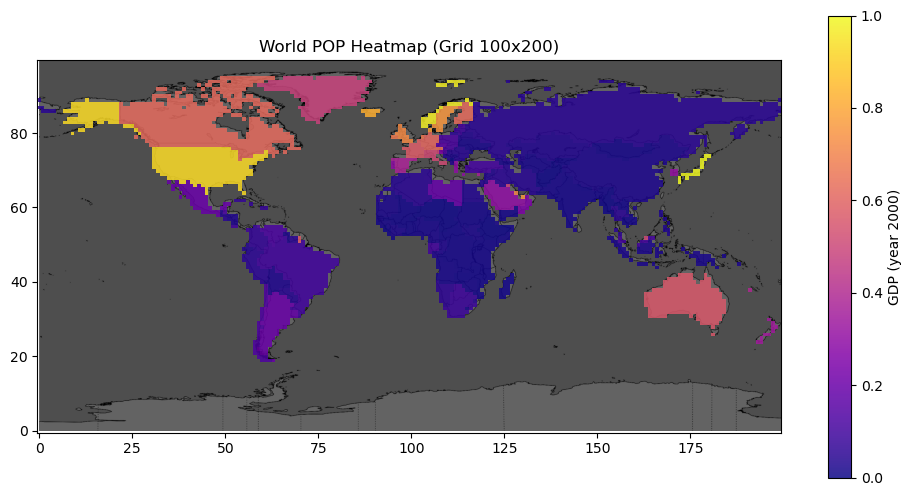

In [7]:
# Plot heatmap
plt.figure(figsize=(12, 6))
cmap = plt.cm.plasma
# norm = mcolors.LogNorm(vmin=gdp_grid_normalized[gdp_grid_normalized>0].min(), vmax=gdp_grid_normalized.max())  # log scale for GDP
norm = mcolors.Normalize(vmin=np.nanmin(gdp_grid_normalized), vmax=np.nanmax(gdp_grid_normalized))


mapa = mpimg.imread('img/World_location_map_(equirectangular_180).png')
plt.imshow(mapa, extent=[0, gdp_grid_normalized.shape[1], 0, gdp_grid_normalized.shape[0]], origin='upper')
im = plt.imshow(gdp_grid_normalized, cmap=cmap, norm=norm, origin="lower", alpha=0.85)
plt.colorbar(im, label="GDP (year 2000)")
plt.title("World POP Heatmap (Grid 100x200)")
plt.show()

In [8]:
# Cargo el dataset de penguins
# Load your CSV
pop_grid = pd.read_csv(
    "../datasets/pop_grid_2000.csv",
    header=None,        # no header row in your file
)

# Convert all to numeric, force errors to NaN
pop_grid = pop_grid.apply(pd.to_numeric, errors="coerce")

print(pop_grid.shape)
print(pop_grid.head())

(100, 200)
   0    1    2    3    4    5    6    7    8    9    ...  190  191  192  193  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

   194  195  196  197  198  199  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 200 columns]


In [9]:
pop_grid.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,2.000000,2.000000,1.000000,1.000000,1.000000,0.0,0.0,2.000000,3.000000,6.000000,...,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,7.000000,8.000000,5.000000,3.000000
mean,8.949016,8.949016,8.949016,8.949016,8.949016,NaN,NaN,30.797301,30.797301,30.797301,...,8.949016,9.414083,8.949016,9.899312,10.578095,9.899312,10.578095,11.087182,10.089371,8.949016
std,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,1.230452,0.000000,2.327740,2.782182,2.327740,2.782182,2.950950,2.549912,0.000000
min,8.949016,8.949016,8.949016,8.949016,8.949016,NaN,NaN,30.797301,30.797301,30.797301,...,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016
25%,8.949016,8.949016,8.949016,8.949016,8.949016,NaN,NaN,30.797301,30.797301,30.797301,...,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016
50%,8.949016,8.949016,8.949016,8.949016,8.949016,NaN,NaN,30.797301,30.797301,30.797301,...,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016,8.949016
75%,8.949016,8.949016,8.949016,8.949016,8.949016,NaN,NaN,30.797301,30.797301,30.797301,...,8.949016,8.949016,8.949016,8.949016,11.799904,8.949016,11.799904,14.650792,8.949016,8.949016
max,8.949016,8.949016,8.949016,8.949016,8.949016,NaN,NaN,30.797301,30.797301,30.797301,...,8.949016,12.204486,8.949016,14.650792,14.650792,14.650792,14.650792,14.650792,14.650792,8.949016


In [10]:
# Normalización (Min-Max)
scaler = MinMaxScaler()
# pop_grid_normalized = pd.DataFrame(scaler.fit_transform(pop_grid), columns=pop_grid.columns)
# print("Normalizado:\n", pop_grid_normalized.head())

# Flatten → scale → reshape
flat = pop_grid.values.reshape(-1, 1)
scaled = scaler.fit_transform(flat).reshape(pop_grid.shape)

pop_grid_normalized = pd.DataFrame(scaled, columns=pop_grid.columns)

In [11]:
pop_grid_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,2.00000,2.00000,1.00000,1.00000,1.00000,0.0,0.0,2.000000,3.000000e+00,6.000000e+00,...,7.00000,7.000000,6.00000,6.000000,7.000000,6.000000,7.000000,8.000000,5.000000,3.00000
mean,0.09531,0.09531,0.09531,0.09531,0.09531,NaN,NaN,0.114601,1.146007e-01,1.146007e-01,...,0.09531,0.095721,0.09531,0.096149,0.096749,0.096149,0.096749,0.097198,0.096317,0.09531
std,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,0.000000,1.699675e-17,1.520235e-17,...,0.00000,0.001086,0.00000,0.002055,0.002456,0.002055,0.002456,0.002605,0.002251,0.00000
min,0.09531,0.09531,0.09531,0.09531,0.09531,NaN,NaN,0.114601,1.146007e-01,1.146007e-01,...,0.09531,0.095310,0.09531,0.095310,0.095310,0.095310,0.095310,0.095310,0.095310,0.09531
25%,0.09531,0.09531,0.09531,0.09531,0.09531,NaN,NaN,0.114601,1.146007e-01,1.146007e-01,...,0.09531,0.095310,0.09531,0.095310,0.095310,0.095310,0.095310,0.095310,0.095310,0.09531
50%,0.09531,0.09531,0.09531,0.09531,0.09531,NaN,NaN,0.114601,1.146007e-01,1.146007e-01,...,0.09531,0.095310,0.09531,0.095310,0.095310,0.095310,0.095310,0.095310,0.095310,0.09531
75%,0.09531,0.09531,0.09531,0.09531,0.09531,NaN,NaN,0.114601,1.146007e-01,1.146007e-01,...,0.09531,0.095310,0.09531,0.095310,0.097828,0.095310,0.097828,0.100345,0.095310,0.09531
max,0.09531,0.09531,0.09531,0.09531,0.09531,NaN,NaN,0.114601,1.146007e-01,1.146007e-01,...,0.09531,0.098185,0.09531,0.100345,0.100345,0.100345,0.100345,0.100345,0.100345,0.09531


In [12]:
pop_grid_normalized.to_csv("../datasets/pop_grid_normalized.csv", index=False, header=False)

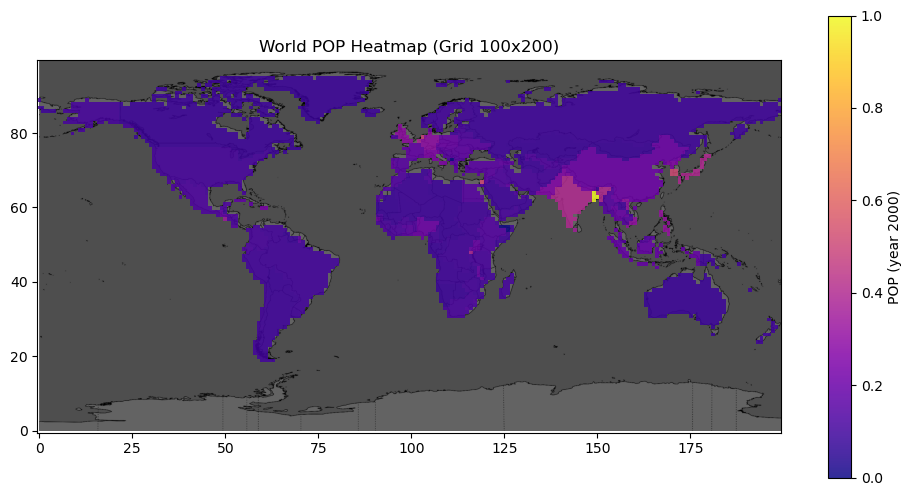

In [13]:
# Plot heatmap
plt.figure(figsize=(12, 6))
cmap = plt.cm.plasma
norm = mcolors.Normalize(vmin=np.nanmin(pop_grid_normalized), vmax=np.nanmax(pop_grid_normalized))

mapa = mpimg.imread('img/World_location_map_(equirectangular_180).png')
plt.imshow(mapa, extent=[0, pop_grid_normalized.shape[1], 0, pop_grid_normalized.shape[0]], origin='upper')
im = plt.imshow(pop_grid_normalized, cmap=cmap, norm=norm, origin="lower", alpha=0.85)
plt.colorbar(im, label="POP (year 2000)")
plt.title("World POP Heatmap (Grid 100x200)")
plt.show()

### ¿Por qué no se puede hacer el split del dataset antes del binning? ### 
##### Cada evento tiene date_start y date_end, entonces si primero spliteamos y después bineamos, las últimas fechas del  train set quedarían después de las primeras del test set, lo cuál se prefiere que no para evitar data leakage. #####


con el xtrain0 quieres predecir ytrain1, ytrain0 es conocido, por eso debe formar parte de xtrain